In [25]:
from sklearn import datasets, svm, metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 01 -  Load Dataset

In [2]:
digits = datasets.load_digits()

### Describe Data

In [9]:
# dataset documentation
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# visualize images - return array object
digits.images

In [11]:
digits.target_names
# we hawe numbers like 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

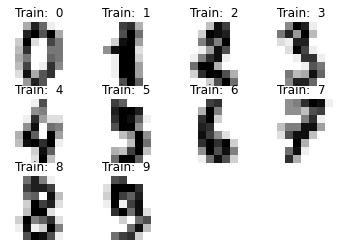

In [12]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
  plt.subplot(3, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation= 'nearest')
  plt.title('Train:  %i' % label)

## Convert data to DataFrame

In [13]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [17]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [18]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Spliting Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe', axis = 1),
                                                     dataset['classe'],
                                                     test_size = 0.3)

### Verify Data Shape

In [24]:
print('X_train.shape: {}, X_test.shape; {}' . format(X_train.shape, X_test.shape))
print('y_train.shape: {}, y_test.shape; {}' . format(y_train.shape, y_test.shape))

X_train.shape: (1257, 64), X_test.shape; (540, 64)
y_train.shape: (1257,), y_test.shape; (540,)


## Machine Learning KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Predict Values


In [29]:
knn_result = knn.predict(X_test)

##### Validation Metrics


In [30]:
from sklearn import  metrics

In [31]:
print(metrics.classification_report(y_test, knn_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        52
           3       0.98      0.94      0.96        50
           4       0.98      0.98      0.98        48
           5       0.98      1.00      0.99        57
           6       1.00      0.98      0.99        53
           7       0.96      1.00      0.98        51
           8       0.95      1.00      0.97        52
           9       1.00      0.92      0.96        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Confusion Matrix

In [32]:
print( pd.crosstab(y_test, knn_result, rownames=['Real Value'], colnames=['                                    Predict'], margins= True))

                                    Predict   0   1   2   3  ...   7   8   9  All
Real Value                                                   ...                 
0                                            56   0   0   0  ...   0   0   0   56
1                                             0  61   0   0  ...   0   0   0   61
2                                             0   0  52   0  ...   0   0   0   52
3                                             0   0   0  47  ...   2   1   0   50
4                                             0   1   0   0  ...   0   0   0   48
5                                             0   0   0   0  ...   0   0   0   57
6                                             0   0   0   0  ...   0   1   0   53
7                                             0   0   0   0  ...  51   0   0   51
8                                             0   0   0   0  ...   0  52   0   52
9                                             0   1   0   1  ...   0   1  55   60
All             

# Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(knn, dataset.drop('classe', axis = 1), dataset['classe'], cv = 5)

In [37]:
scores

#array para cada iteracao, em 5 iteracoes retorna a precisao para cada uma:

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

## Optimize K parameter

In [ ]:
#